# BME 450 - Ocean Engineering
## Final Project: Hydrophone Data Analysis
## Matthew Munson
## March 11th 2020



In [9]:
# Run this if you haven't installed obspy!
#!pip install --upgrade seaborn==0.9.0
#!pip install obspy

In [5]:
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
from scipy.fftpack import fft
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests

# Section 1: Wind and Rain Noise

### PowerSpectralDensity

Helper function that calculates psd and plots it

Credit to Professor Shima Abadi

In [3]:
def powerSpectralDensity(st):
    
    fs = st[0].stats.sampling_rate
    t_start = st[0].stats.starttime + 5 
    t_end = st[0].stats.starttime + 25
    sliced = st.slice(t_start, t_end)
    
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
    fre = np.linspace(1,fs,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9
    plt.plot(fre[0:32000], data_db[0:32000],color='r',label='PSD')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [dB**2/Hz]')
    plt.xlim(0,15000)

## Oregon Offshore

#### Weather Conditions: Rainy, not Windy

Text(0.5,1,'PSD vs. Frequency: Offshore, Rainy, not Windy')

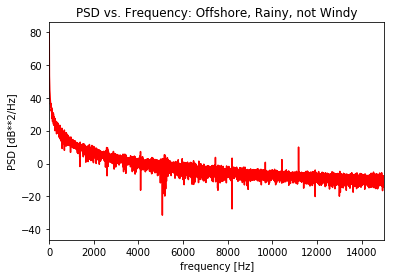

In [9]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/10/30/OO-HYEA2--YDH-2017-10-30T00:00:00.000000.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Offshore, Rainy, not Windy')

#### Weather Conditions: Windy, not Rainy

Text(0.5,1,'PSD vs. Frequency: Offshore, Windy, not Rainy')

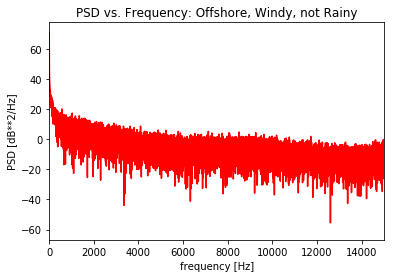

In [10]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/07/26/OO-HYEA2--YDH-2017-07-26T06:17:57.447250.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Offshore, Windy, not Rainy')

#### Weather Conditions: Rainy and Windy

Text(0.5,1,'PSD vs. Frequency: Offshore, Rainy and Windy')

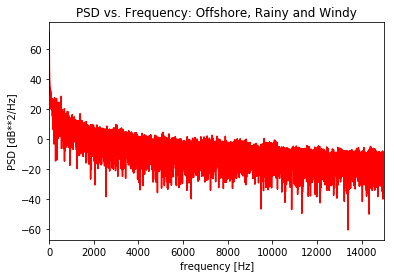

In [11]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/01/28/OO-HYEA2--YDH-2017-01-28T00:00:00.000015.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Offshore, Rainy and Windy')

#### Weather Conditions: Not Windy or Rainy

Text(0.5,1,'PSD vs. Frequency: Offshore, Not Windy or Rainy')

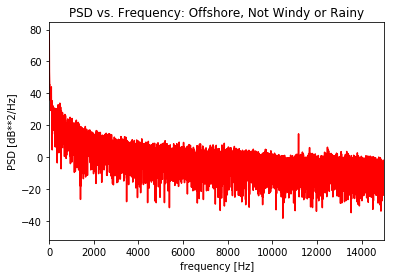

In [12]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/09/25/OO-HYEA2--YDH-2017-09-25T00:00:00.000015.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Offshore, Not Windy or Rainy')

## Oregon Shelf

#### Weather Conditions: Rainy, not Windy

Text(0.5,1,'PSD vs. Frequency: Shelf, Rainy, not Windy')

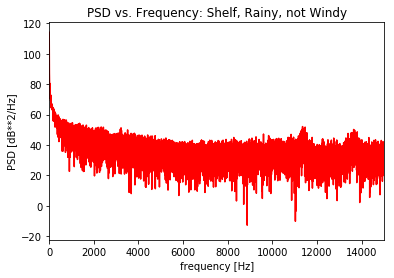

In [6]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/11/16/OO-HYEA1--YDH-2018-11-16T13:09:51.544688.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Shelf, Rainy, not Windy')

#### Weather Conditions: Windy, not Rainy

Text(0.5,1,'PSD vs. Frequency: Shelf, Windy, not Rainy')

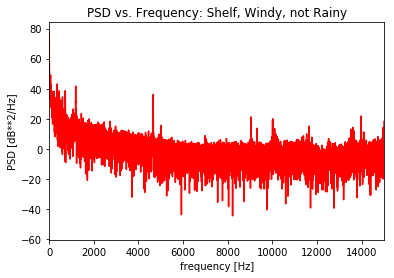

In [7]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/07/17/OO-HYEA1--YDH-2018-07-17T00:00:00.000015.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Shelf, Windy, not Rainy')

#### Weather Conditions: Rainy and Windy

Text(0.5,1,'PSD vs. Frequency: Shelf, Windy and Rainy')

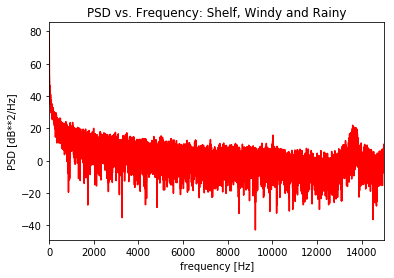

In [13]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/02/24/OO-HYEA1--YDH-2018-02-24T09:15:30.449687.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Shelf, Windy and Rainy')

#### Weather Conditions: Not Windy or Rainy

Text(0.5,1,'PSD vs. Frequency: Shelf, Not Windy or Rainy')

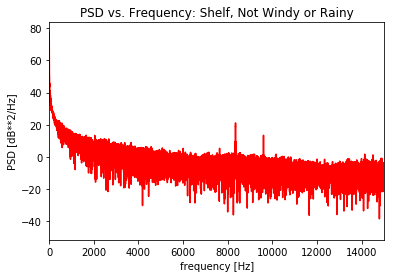

In [8]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/09/20/OO-HYEA1--YDH-2018-09-20T00:00:00.000000.mseed')
powerSpectralDensity(st)
plt.title('PSD vs. Frequency: Shelf, Not Windy or Rainy')

## Section 2:  Airgun, Marine Mammals, and Earthquake/Volcano Noise

### spectrogram

Helper function that calculates a spectrogram and plots it

Credit to Professor Shima Abadi

In [15]:
def spectrogram(st, start, ylim):
    
    fs = st[0].stats.sampling_rate
    t_start = st[0].stats.starttime + start
    t_end = st[0].stats.starttime + start + 60
    sliced = st.slice(t_start, t_end)

    npts = len(sliced[0])
    end = npts / fs
    nfft = int(fs/16)  
    per_lap = 0.90      
    nlap = int(nfft * float(per_lap))   

    specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
    specgram = 10 * np.log10(specgram) +169-128.9
    plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
    plt.xlabel('time (s)')
    plt.ylabel('freq (Hz)')
    plt.colorbar()
    plt.ylim(0, ylim)

### Marine Mammal Vocalization

Text(0.5, 1.0, 'Marine Mammal Vocalization Spectogram')

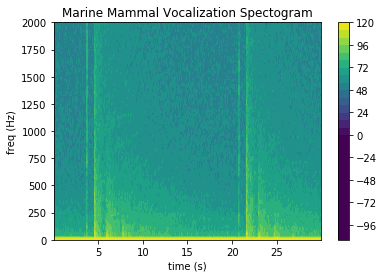

In [3]:
st = read('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed')
spectrogram(st, 10, 2000)
plt.title('Marine Mammal Vocalization Spectogram')

### Airgun Noise

Text(0.5, 1.0, 'Airgun Noise Spectogram')

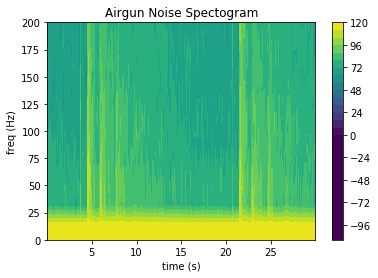

In [4]:
st = read('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed')
spectrogram(st, 10, 200)
plt.title('Airgun Noise Spectogram')

### Earthquake Noise

Text(0.5,1,'Earthquake Spectogram')

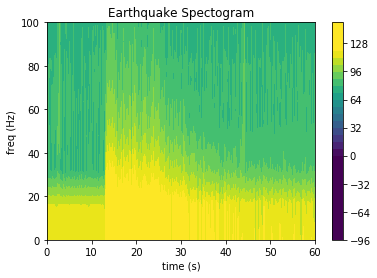

In [16]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2017/04/15/OO-HYEA1--YDH-2017-04-15T14:45:00.000000.mseed')
spectrogram(st, 210, 100)
plt.title('Earthquake Spectogram')